### AlexNet architecture
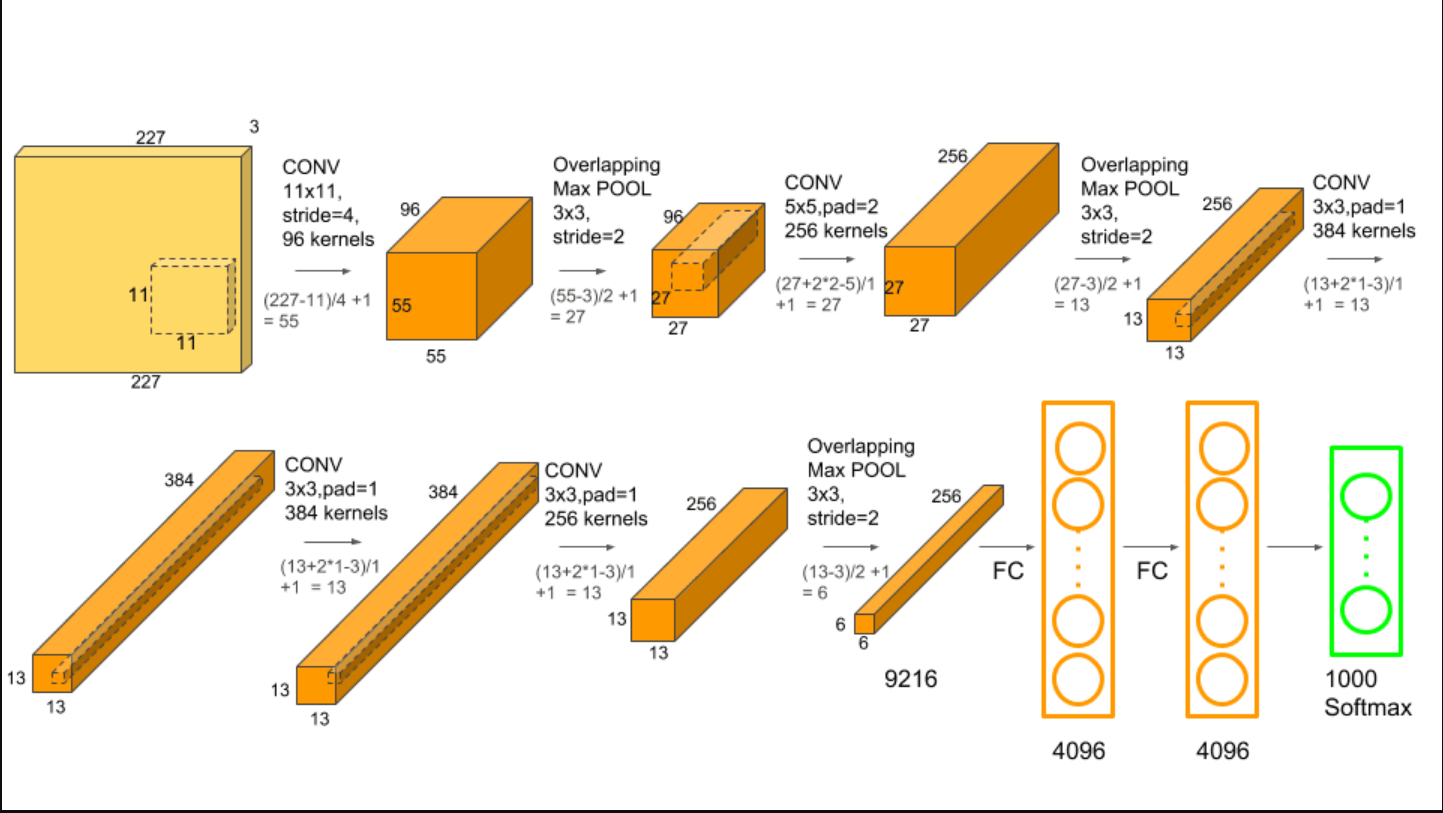|

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses
from keras import backend as k
from sklearn.model_selection import train_test_split


In [11]:
(x_train,y_train),(x_test,y_test) = datasets.mnist.load_data()

# Splitting the validation set
x_train , x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size = 0.08333)

# Adding Dimension for color channel
x_train = tf.expand_dims(x_train, axis = 3)
x_test = tf.expand_dims(x_test, axis = 3)
x_validation = tf.expand_dims(x_validation, axis = 3)

# Repeating the array to form 3 color channels
x_train = tf.repeat(x_train, 3, axis = 3)
x_test = tf.repeat(x_test, 3, axis = 3)
x_validation = tf.repeat(x_validation, 3, axis = 3)


In [12]:
model = models.Sequential()
model.add(layers.experimental.preprocessing.Resizing(227, 227, interpolation="bilinear",
                                                     input_shape=x_train.shape[1:]))

# Layer 1
# conv1 with 96 outputs
model.add(layers.Conv2D(96, 11, strides=4, padding='same'))
model.add(layers.Lambda(tf.nn.local_response_normalization))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(3, strides=2))

# Layer 2
# conv2 with 256 outputs
model.add(layers.Conv2D(256, 5, strides=4, padding = 'same'))
model.add(layers.Lambda(tf.nn.local_response_normalization))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(3, strides=2))

# Layer 3
# conv3 with 384 outputs
model.add(layers.Conv2D(384, 3, strides=4, padding = 'same'))
model.add(layers.Activation('relu'))

# Layer 4
# conv4 with 384 outputs
model.add(layers.Conv2D(384, 3, strides=4, padding='same'))
model.add(layers.Activation('relu'))

# Layer 5
# conv5 with 256 outputs
model.add(layers.Conv2D(256, 3, strides=4, padding = 'same'))
model.add(layers.Activation('relu'))

# Flattening 6x6x256 to 9216 features
model.add(layers.Flatten())

# Layer 6
# fc6 with 4096 outputs
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))

# Layer 7
# fc7 with 4096 outputs
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))

# Layer 8
# In original AlexNet model we have 1000 output from our output layer fc8,
# since it's trained on imagenet dataset wich has 1000 categories
# But here we have 10 categories only in our dataset, therefore
# fc8 with 10 outputs
model.add(layers.Dense(10, activation='softmax'))
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_3 (Resizing)       (None, 227, 227, 3)       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 57, 57, 96)        34944     
                                                                 
 lambda_6 (Lambda)           (None, 57, 57, 96)        0         
                                                                 
 activation_14 (Activation)  (None, 57, 57, 96)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 28, 28, 96)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 7, 7, 256)         614656    
                                                      

In [ ]:
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics= ['accuracy'])
history = model.fit(x_train, y_train, batch_size=64,epochs=1, validation_data=(x_validation, y_validation))


243/860 [=======>......................] - ETA: 9:43 - loss: 1.3149 - accuracy: 0.4725